In [1]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/
%cd "/content/drive/My Drive"
%cd "Colab Notebooks/nthudl/final_project"
!ls

Mounted at /content/drive
MyDrive  Shareddrives
/content/drive/My Drive
/content/drive/My Drive/Colab Notebooks/nthudl/final_project
 0111_epochs_12_batch_128_Adam_lr_0.0001
 0111_epochs_20_batch_128_Adam_lr_0.0001
 0111_epochs_30_batch_128_Adam_lr_0.0001
 0111LSTM_epochs_10_batch_128_Adam_lr_0.0001
 0111LSTM_epochs_25_batch_128_Adam_lr_0.0001
 0111snn6_epochs_10_batch_128_Adam_lr_0.0001
 0111snn6_epochs_12_batch_128_Adam_lr_0.0001
 0111snn6_epochs_20_batch_128_Adam_lr_0.0001
 0111snn6_epochs_30_batch_128_Adam_lr_0.0001
 0111snn6_epochs_5_batch_128_Adam_lr_0.0001
 0111snn6_epochs_6_batch_128_Adam_lr_0.0001
 0112snn6_epochs_10_batch_32_Adam_lr_0.0001
 0112snn6_epochs_5_batch_128_Adam_lr_0.0001
 0112snn6_epochs_6_batch_64_Adam_lr_0.0001
 0112snn6_epochs_7_batch_128_Adam_lr_0.0001
 0112snn6_epochs_7_batch_64_Adam_lr_0.0001
 0112snn6_epochs_8_batch_32_Adam_lr_0.0001
 0112snn6_epochs_8_batch_64_Adam_lr_0.0001
 0112snn6_epochs_9_batch_32_Adam_lr_0.0001
 0112snn7_epochs_10_batch_64_Adam_lr_0.

In [2]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# data = pd.read_csv('./report_change (2).csv')
# test = pd.read_csv('./submission.csv')
# os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [ ]:
# all_data = data

In [ ]:
# data.head()

,1,2,3,4,5,8,9,10,12,13,14,15,16,18,Health,Weight,11
0,1,2013,3,A,52612,1,1,78.0,1,3,26,3,5,1,0.0,610.752251,29.4
1,2,2013,4,A,52612,1,1,107.0,1,4,27,4,5,1,0.0,610.752251,27.8
2,3,2013,5,A,52612,1,1,140.0,1,5,28,5,5,2,0.0,610.752251,9.0
3,4,2013,6,A,52612,1,1,175.0,1,6,29,6,5,2,0.0,610.752251,13.0
4,5,2013,7,A,52612,1,1,210.0,1,7,30,7,5,2,0.0,610.752251,13.2


In [ ]:
# data = data.dropna(axis = 0, subset = ['11'] ) # take out testing data

In [ ]:
#data = data.fillna(method='pad')
#data = data.fillna(0)
#data = data.fillna(data.mean())
#data_np = data
# data_np = data.values
# data_np[800,14]

0.0

In [ ]:
# data_np_re = data_np.reshape(data_np[:].shape[0], data_np[:].shape[1])
# data_np_re.shape

(33254, 17)

In [ ]:
# all_data = all_data.fillna(method='pad')
# all_data = all_data.values
# all_data = all_data.reshape(all_data[:].shape[0], all_data[:].shape[1])
# all_data.shape

(37517, 17)

In [ ]:
# data_np_re = data_np.reshape(data_np[:].shape[0], data_np[:].shape[1])
# data_np_re.shape

(33254, 17)

In [3]:
x_train = pd.read_csv('data1/x_train.csv', header=0, low_memory=False)
y_train = pd.read_csv('data1/y_train.csv', header=0, low_memory=False)
x_test = pd.read_csv('data1/x_test.csv', header=0, low_memory=False)
y_test = pd.read_csv('data1/y_test.csv', header=0, low_memory=False)
print('x_train.shape= {}, y_train.shape= {}'.format(x_train.shape, y_train.shape))
print('x_test.shape= {}, y_test.shape= {}'.format(x_test.shape, y_test.shape))

x_train.set_index('ID', inplace=True)
y_train.set_index('ID', inplace=True)
x_test.set_index('ID', inplace=True)
y_test.set_index('ID', inplace=True)

print('x_train.shape= {}, y_train.shape= {}'.format(x_train.shape, y_train.shape))
print('x_test.shape= {}, y_test.shape= {}'.format(x_test.shape, y_test.shape))

x_train.shape= (33254, 4013), y_train.shape= (33254, 2)
x_test.shape= (4263, 4013), y_test.shape= (4263, 2)
x_train.shape= (33254, 4012), y_train.shape= (33254, 1)
x_test.shape= (4263, 4012), y_test.shape= (4263, 1)


In [ ]:
# 5 8 9 11 12
# temp = [5, 8, 9, 11, 12]
# for j in range(len(temp)):
#     mark = temp[j]
#     for i in range(data_np_re.shape[0]):
#         if( (data_np_re[:,mark][i] <= 2) or (data_np_re[:,mark][i] == 12) ):
#             data_np_re[:,mark][i] = 4
#         elif( data_np_re[:,mark][i] <= 5 ):
#             data_np_re[:,mark][i] = 1
#         elif( data_np_re[:,mark][i] <= 8 ):
#             data_np_re[:,mark][i] = 2
#         else:
#             data_np_re[:,mark][i] = 3

            
# for i in range(data_np_re.shape[0]):
#     if(data_np_re[:,3][i] == 'A'):
#         data_np_re[:,3][i] = 1
#     elif(data_np_re[:,3][i] == 'B'):
#         data_np_re[:,3][i] = 2
#     else:
#         data_np_re[:,3][i] = 3
        
# data_np_re[:,11]

array([1, 1, 1, ..., 2, 2, 2], dtype=object)

In [ ]:
# 5 8 9 11 12
# temp = [5, 8, 9, 11, 12]
# for j in range(len(temp)):
#     mark = temp[j]
#     for i in range(all_data.shape[0]):
#         if( (all_data[:,mark][i] <= 2) or (all_data[:,mark][i] == 12) ):
#             all_data[:,mark][i] = 4
#         elif( all_data[:,mark][i] <= 5 ):
#             all_data[:,mark][i] = 1
#         elif( all_data[:,mark][i] <= 8 ):
#             all_data[:,mark][i] = 2
#         else:
#             all_data[:,mark][i] = 3

            
# for i in range(all_data.shape[0]):
#     if(all_data[:,3][i] == 'A'):
#         all_data[:,3][i] = 1
#     elif(all_data[:,3][i] == 'B'):
#         all_data[:,3][i] = 2
#     else:
#         all_data[:,3][i] = 3
        
# all_data[:,11]

array([1, 1, 1, ..., 2, 2, 2], dtype=object)

In [ ]:
### NORMALIZE ###
# 7 10 15 17 19 20 26 27
# mean7 = np.mean(data_np_re[:,7],axis = 0)
# std7 = np.std(data_np_re[:,7],axis = 0)
# mean10 = np.mean(data_np_re[:,10],axis = 0)
# std10 = np.std(data_np_re[:,10],axis = 0)
# mean15 = np.mean(data_np_re[:,15],axis = 0)
# std15 = np.std(data_np_re[:,15],axis = 0)

# for i in range(data_np_re.shape[0]):
#     if( std7 != 0 ):
#         data_np_re[i,7] = (data_np_re[i,7] - mean7) / std7
#     if( std10 != 0 ):
#         data_np_re[i,10] = (data_np_re[i,10] - mean10) / std10
#     if( std15 != 0 ):
#         data_np_re[i,15] = (data_np_re[i,15] - mean15) / std15

In [ ]:
### NORMALIZE ###
# 7 10 15
# mean7 = np.mean(all_data[:,7],axis = 0)
# std7 = np.std(all_data[:,7],axis = 0)
# mean10 = np.mean(all_data[:,10],axis = 0)
# std10 = np.std(all_data[:,10],axis = 0)
# mean15 = np.mean(all_data[:,15],axis = 0)
# std15 = np.std(all_data[:,15],axis = 0)

# for i in range(all_data.shape[0]):
#     if( std7 != 0 ):
#         all_data[i,7] = (all_data[i,7] - mean7) / std7
#     if( std10 != 0 ):
#         all_data[i,10] = (all_data[i,10] - mean10) / std10
#     if( std15 != 0 ):
#         all_data[i,15] = (all_data[i,15] - mean15) / std15

In [ ]:
# data_np_re = data_np_re.astype(float)
# data_np_re

array([[ 1.00000000e+00,  2.01300000e+03,  3.00000000e+00, ...,
         0.00000000e+00, -3.10407117e-02,  2.94000000e+01],
       [ 2.00000000e+00,  2.01300000e+03,  4.00000000e+00, ...,
         0.00000000e+00, -3.10407117e-02,  2.78000000e+01],
       [ 3.00000000e+00,  2.01300000e+03,  5.00000000e+00, ...,
         0.00000000e+00, -3.10407117e-02,  9.00000000e+00],
       ...,
       [ 3.75150000e+04,  2.01400000e+03,  6.00000000e+00, ...,
         0.00000000e+00,  5.19291257e+00,  1.90000000e+01],
       [ 3.75160000e+04,  2.01400000e+03,  7.00000000e+00, ...,
         0.00000000e+00,  5.19291257e+00,  1.20000000e+01],
       [ 3.75170000e+04,  2.01400000e+03,  8.00000000e+00, ...,
         0.00000000e+00,  5.19291257e+00,  1.00000000e+01]])

In [5]:
### TRAINING ###
x = x_train
xx = x_test
y = y_train
dim = x_train.shape[1]
w_1 = np.zeros([dim,1])
bias = 0.0000000001
learning_rate = 0.1
iter_time = 5000
adagrad_1 = np.zeros([dim,1])
loss_total = []
for t in range(iter_time):
    loss = np.sqrt(np.sum(np.power(np.dot(x, w_1) - y, 2))/x_train.shape[0]) # RMSE
    
    if( t%50 == 0 ):
        print(str(t) + ":" + str(loss))
        loss_total.append(loss)
        
    gradient = 2 * np.dot(x.T, np.dot(x,w_1)-y)
    adagrad_1 += gradient ** 2
    w_1 = w_1 - learning_rate * gradient / np.sqrt(adagrad_1+bias)

0:乳量    25.535017
dtype: float64
50:乳量    17.49579
dtype: float64
100:乳量    14.563866
dtype: float64
150:乳量    12.630924
dtype: float64
200:乳量    11.22462
dtype: float64
250:乳量    10.157111
dtype: float64
300:乳量    9.328474
dtype: float64
350:乳量    8.676739
dtype: float64
400:乳量    8.159731
dtype: float64
450:乳量    7.747016
dtype: float64
500:乳量    7.415807
dtype: float64
550:乳量    7.148657
dtype: float64
600:乳量    6.932034
dtype: float64
650:乳量    6.755367
dtype: float64
700:乳量    6.610369
dtype: float64
750:乳量    6.490538
dtype: float64
800:乳量    6.390763
dtype: float64
850:乳量    6.307031
dtype: float64
900:乳量    6.236185
dtype: float64
950:乳量    6.175739
dtype: float64
1000:乳量    6.123732
dtype: float64
1050:乳量    6.078616
dtype: float64
1100:乳量    6.039163
dtype: float64
1150:乳量    6.004395
dtype: float64
1200:乳量    5.973533
dtype: float64
1250:乳量    5.94595
dtype: float64
1300:乳量    5.921142
dtype: float64
1350:乳量    5.8987
dtype: float64
1400:乳量    5.87829
dtype: float64
1450:乳量 

In [6]:
print(loss)


乳量    5.549933
dtype: float64


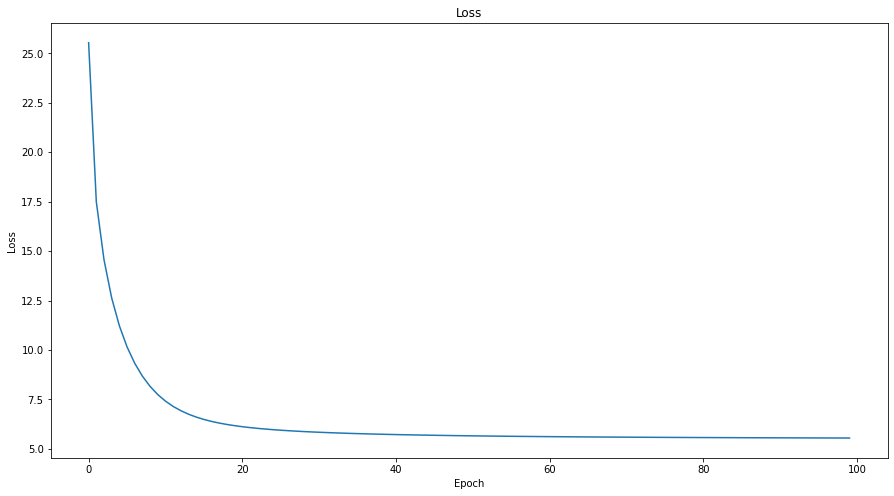

In [7]:
plt.figure(figsize=(15,8))
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_total)
#plt.plot(loss_total, label = 'train loss')
#plt.legend(loc="best")
plt.show()

In [ ]:
# ### TESTING ###
# test = test.values
# test = test.reshape(test[:].shape[0], test[:].shape[1])

# data_test = []
# #data_test = np.ones((1, 9))
# data_test = np.ones((1, 11))[np.newaxis,:]

# #x = np.hstack((data_np_re[:,1:7], data_np_re[:,8:11]))

# for i in range(test.shape[0]):
#     #print(i)
#     tmp = test[i,0]
#     indx = np.where(all_data[:,0]==tmp)
#     data_test = np.concatenate((data_test, xx[indx, :]),axis = 0)
# print(data_test.shape)

(4264, 1, 11)


In [ ]:
# data_test = data_test.reshape(4264,11)
# data_test = np.delete(data_test, 0 , axis = 0 )
# print(data_test.shape)

(4263, 11)


In [8]:
temp1 = np.dot(x_test, w_1)
result = temp1
print(result)

[[21.58423379]
 [31.75725867]
 [30.91379129]
 ...
 [15.19778122]
 [14.03848841]
 [15.38552649]]


In [ ]:
# result = np.concatenate((test[:,0][:,np.newaxis], result),axis = 1)

# pd.DataFrame(result).to_csv("./submission2.csv",index=0, header = ['ID', '1'])
# print(result) 

[[480.0 19.151285500868124]
 [742.0 27.439938397451932]
 [743.0 24.099546329168565]
 ...
 [37483.0 27.981381814704704]
 [37484.0 27.09359233316804]
 [37485.0 28.89924132787489]]


In [9]:
def output(filepath, data):
    df_SAMPLE = pd.DataFrame.from_dict(data)
    df_SAMPLE.to_csv(filepath, index=False)
    print('Success output to ' + filepath)

In [10]:
y_test['乳量'] = result
y_test.reset_index(inplace=True)
print(y_test.head(n=3))
output('models_results/1st_5000.csv', y_test)

    ID         乳量
0  480  21.584234
1  742  31.757259
2  743  30.913791
Success output to models_results/1st_5000.csv
